In [1]:
import json
import pandas as pd


In [2]:
lines=[]
pos_num=0
neg_num=0
num_total=70000

with open('yelp_dataset/yelp_academic_dataset_review.json', 'r') as f:
    for line in f:
        json_data=json.loads(line)
        
        if json_data['stars']>3:
            if pos_num>num_total:
                continue
            pos_num+=1
        elif json_data['stars']<3:
            if neg_num>num_total:
                continue
            neg_num+=1
        else:
            continue
            
        lines.append(json_data)           
    

In [3]:
review=pd.DataFrame(lines)
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g


In [4]:
review['sentiment']=(review['stars']>3).astype(int)

In [5]:
print('some examples of reviews')
print(review['text'][0])
print('\n')
print(review['text'][10])

some examples of reviews
The pizza was okay. Not the best I've had. I prefer Biaggio's on Flamingo / Fort Apache. The chef there can make a MUCH better NY style pizza. The pizzeria @ Cosmo was over priced for the quality and lack of personality in the food. Biaggio's is a much better pick if youre going for italian - family owned, home made recipes, people that actually CARE if you like their food. You dont get that at a pizzeria in a casino. I dont care what you say...


I have been an Emerald Club member for a number of years.  I have always been very satisfied with their vehicles and customer service.  This recent visit to Pittsburgh was no exception.


In [6]:
!pip install contractions

spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.3 which is incompatible.
spacy 2.0.18 has requirement regex==2018.01.10, but you'll have regex 2018.11.22 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
!pip install -U nltk

Requirement already up-to-date: nltk in /home/phoenix/miniconda3/envs/gpu/lib/python3.6/site-packages (3.4)
Requirement not upgraded as not directly required: six in /home/phoenix/miniconda3/envs/gpu/lib/python3.6/site-packages (from nltk) (1.11.0)
Requirement not upgraded as not directly required: singledispatch in /home/phoenix/miniconda3/envs/gpu/lib/python3.6/site-packages (from nltk) (3.4.0.3)
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.3 which is incompatible.
spacy 2.0.18 has requirement regex==2018.01.10, but you'll have regex 2018.11.22 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [8]:
#data cleanning:
#expand contractions
#remove non alphabert words (punctuations, special characters such as @,# etc)
#lower case everything
#remove stopwords

import contractions
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean(doc):
    
    doc=contractions.fix(doc)
    
    pattern_to_find = "[^a-zA-Z0-9' ]";
    pattern_to_repl = "";
    doc=re.sub(pattern_to_find, pattern_to_repl, doc).lower()
    
    eng_stopwords = set(stopwords.words("english"));
    sentence = ' '.join(word for word in doc.split() if word not in eng_stopwords)
    
    return sentence  

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/phoenix/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
print(clean('I\'ve got a nanny##@@'))

got nanny


In [10]:
review['clean_text']=review['text'].apply(clean)

In [11]:
review.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment,clean_text
0,iCQpiavjjPzJ5_3gPD5Ebg,0,2011-02-25,0,x7mDIiDB3jEiPGPHOmDzyw,2,The pizza was okay. Not the best I've had. I p...,0,msQe1u7Z_XuqjGoqhB0J5g,0,pizza okay best prefer biaggio's flamingo fort...
1,pomGBqfbxcqPv14c3XH-ZQ,0,2012-11-13,0,dDl8zu1vWPdKGihJrwQbpw,5,I love this place! My fiance And I go here atl...,0,msQe1u7Z_XuqjGoqhB0J5g,1,love place fiance go atleast week portions hug...
2,jtQARsP6P-LbkyjbO1qNGg,1,2014-10-23,1,LZp4UX5zK3e-c5ZGSeo3kA,1,Terrible. Dry corn bread. Rib tips were all fa...,3,msQe1u7Z_XuqjGoqhB0J5g,0,terrible dry corn bread rib tips fat mushy fla...
3,elqbBhBfElMNSrjFqW3now,0,2011-02-25,0,Er4NBWCmCD4nM8_p1GRdow,2,Back in 2005-2007 this place was my FAVORITE t...,2,msQe1u7Z_XuqjGoqhB0J5g,0,back 20052007 place favorite thai place ever w...
4,Ums3gaP2qM3W1XcA5r6SsQ,0,2014-09-05,0,jsDu6QEJHbwP2Blom1PLCA,5,Delicious healthy food. The steak is amazing. ...,0,msQe1u7Z_XuqjGoqhB0J5g,1,delicious healthy food steak amazing fish pork...


Words can't be directly fed into the model, instead we need to encode each word to a unique numerical value. Therefore a review is transformed from being an array of words to an array of integer values.


In [12]:
def lenth(sentence):
    return len(sentence.split(' '))
review['len']=review['clean_text'].apply(lenth)

(0, 150)

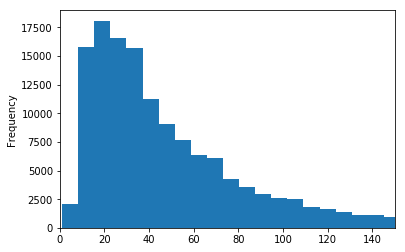

In [13]:
%matplotlib inline
ax=review['len'].plot.hist(bins=100)
ax.set_xlim([0,150])

It seems that 20-60 is the most common length. We can choose to cap at 60 words for our model.

In [14]:
max_len=60

In [15]:
# split data into train and test
from sklearn.model_selection import train_test_split

X=review['clean_text']
y=review['sentiment']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values


In [16]:
import numpy as np

# load the glove word vectors

def read_glove_vecs(glove_file):
    with open(glove_file,'r') as f:
        words=set()
        word_to_vec={}
        
        for line in f:
            line=line.strip().split()
            curr_word=line[0]
            words.add(curr_word)
            word_to_vec[curr_word]=np.array(line[1:],dtype=np.float64)
        
        word_to_index={}
        index_to_word={}
        
        i=0
        for w in sorted(words):
            word_to_index[w] = i
            index_to_word[i] = w
            i = i + 1
        
        return word_to_index, index_to_word, word_to_vec    

In [17]:
word_to_index, index_to_word, word_to_vec= read_glove_vecs('glove.6B.50d.txt')

In [18]:
len(word_to_index)

400000

In [19]:
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence


/home/phoenix/miniconda3/envs/gpu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [20]:
#convert each sentence to indices:

def sentences_to_indices(X, word_to_index, max_len):
    
    m=X.shape[0]
    
    X_indices=np.zeros((m,max_len))
    
    for i in range(m):
        sentence=X[i].split()
        
        # if a word is not in vocabulary, simply discard it
        j=0
        for w in sentence[0:max_len]:
            if w in word_to_index:
                X_indices[i, j] = word_to_index[w]  
                j=j+1

    return X_indices
            

In [21]:
sentences_to_indices(X_train[0:2],word_to_index,10)

array([[343838., 318909., 141829.,  59936.,  31743., 132713.,  58998.,
         57717., 171585., 368320.],
       [302801., 270538., 158171., 341140., 154058.,  62725., 325757.,
        145459., 373357., 118925.]])

In [22]:
# define the embedding layer

def pretrained_embedding_layer(word_to_vec, word_to_index):
    
    """
    Creates a Keras Embedding() layer and loads in pre-trained GloVe 50-dimensional vectors.
    Arguments:
    word_to_vec -- dictionary mapping words to their GloVe vector representation.
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)
    
    """
    vocal_len=len(word_to_index)+1
    vec_len=50  
    
    emb_matrix=np.zeros((vocal_len,vec_len))
    
    for word,index in word_to_index.items():
        emb_matrix[index,:]=word_to_vec[word]
    
    embedding_layer = Embedding(vocal_len,50,trainable=False)
    embedding_layer.build((None,))
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [23]:
def Sentiment_model(input_shape, word_to_vec, word_to_index):
    
    """
    Function creating the Sentiment Analysis model's graph.
    
    Arguments:
    input_shape -- shape of the input, usually (batch_size, max_len,)
    word_to_vec -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    model -- a model instance in Keras
    """
    
    sentence_indices = Input(input_shape,dtype='int32')
    embedding_layer= pretrained_embedding_layer(word_to_vec, word_to_index)
    
    embeddings=embedding_layer(sentence_indices)
    
    X = LSTM(128, return_sequences=True)(embeddings)
    X = Dropout(0.5)(X)
    X = LSTM(128, return_sequences=False)(X)
    X = Dropout(0.5)(X)
    X = Dense(1)(X)
    X = Activation ('sigmoid') (X)
    
    model = Model(inputs=sentence_indices,outputs=X)
    
    return model


In [24]:
model = Sentiment_model((max_len,), word_to_vec, word_to_index)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 60)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 60, 50)            20000050  
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 128)           91648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
__________

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
X_train_indices = sentences_to_indices(X_train, word_to_index, max_len)
X_test_indices = sentences_to_indices(X_test, word_to_index, max_len)
print(X_train_indices.shape)

(112001, 60)


In [27]:
history=model.fit(X_train_indices, y_train, batch_size=50, epochs=10)

Epoch 1/10
112001/112001 [==============================] - 483s 4ms/step - loss: 0.3605 - acc: 0.8423
Epoch 2/10
112001/112001 [==============================] - 484s 4ms/step - loss: 0.2485 - acc: 0.8980
Epoch 3/10
112001/112001 [==============================] - 485s 4ms/step - loss: 0.2179 - acc: 0.9120
Epoch 4/10
112001/112001 [==============================] - 481s 4ms/step - loss: 0.1985 - acc: 0.9199
Epoch 5/10
112001/112001 [==============================] - 473s 4ms/step - loss: 0.1813 - acc: 0.9277
Epoch 6/10
112001/112001 [==============================] - 469s 4ms/step - loss: 0.1636 - acc: 0.9356
Epoch 7/10
112001/112001 [==============================] - 470s 4ms/step - loss: 0.1493 - acc: 0.9416
Epoch 8/10
112001/112001 [==============================] - 471s 4ms/step - loss: 0.1326 - acc: 0.9486
Epoch 9/10
112001/112001 [==============================] - 470s 4ms/step - loss: 0.1185 - acc: 0.9549
Epoch 10/10
112001/112001 [==============================] - 470s 4ms/ste

In [28]:
loss, acc = model.evaluate(X_test_indices, y_test)
print()
print("Test accuracy = ", acc)

28001/28001 [==============================] - 62s 2ms/step

Test accuracy =  0.9152530266776187


Text(0,0.5,'train_loss')

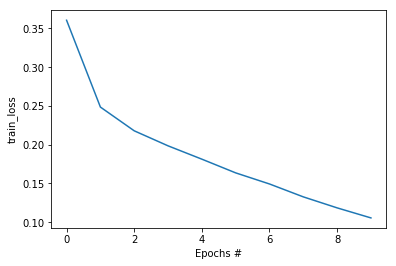

In [29]:

%matplotlib inline
import matplotlib.pyplot as plt
loss_hist=history.history['loss']
epochs=range(0,10,1)
plt.plot(epochs,loss_hist)
plt.xlabel('Epochs #')
plt.ylabel('train_loss')